# AppTrendz: A Comparative Analysis of Mobile Application Data|

## Introduction

In "AppTrendz," I embark on a solo journey as a data analyst, delving into the world of Android and iOS mobile application development. My project centers around applications that are free to download, with a revenue model based on in-app advertisements. The key to success in this model lies in user engagement: the higher the interaction with ads within my apps, the greater the potential for revenue. This project is not just an analytical exercise; it's a portfolio piece that demonstrates my capability to dissect and understand app store data, which is crucial for making informed strategic decisions in app development.

My mission is to meticulously analyze the extensive data from the Apple Store and the Android Store. I aim to unearth trends and patterns that are pivotal in determining user engagement and the popularity of mobile apps. Through this project, I intend to equip myself with valuable insights about which types of apps are likely to draw a more substantial user base. More than just grasping the current trends, my analysis is directed towards forecasting which app genres are poised to capture the most attention and engagement from users. This project serves as a testament to my analytical skills and my adeptness at translating complex data into practical, actionable strategies for app development and marketing, making it an ideal showcase for potential employers and collaborators in the future.


In [79]:
file_apple = open('AppleStore.csv')
from csv import reader
read = reader(file_apple)
ios_data = list(read)
ios_header = ios_data[0]

In [80]:
file_playstore = open('googleplaystore.csv')
from csv import reader
read = reader(file_playstore)
apk_data = list(read)
apk_header = apk_data[0]

In [81]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n')
    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

In [82]:
print(ios_header)
print('\n')
explore_data(ios_data,1,3,True)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


Number of rows: 7198
Number of columns: 16


This dataset encompasses data for 7,197 iOS applications. The columns that stand out as particularly relevant for our study are: 'track_name', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', and 'prime_genre'. While some column names may not be immediately clear, further information about each can be found in the accompanying documentation for the dataset.

In [83]:
print(apk_header)
print('\n')
explore_data(apk_data,1,3,True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


Number of rows: 10842
Number of columns: 13


Upon examining the Google Play dataset, it's evident that it encompasses data for 10,841 applications, distributed across 13 distinct columns. On initial inspection, the columns that appear most pertinent for our analytical objectives include 'App', 'Category', 'Reviews', 'Installs', 'Type', 'Price', and 'Genres'


## Deleting Wrong Data

There's an active discussion section for the Google Play dataset, where one of the topics highlights a potential error in row 10472. To investigate this, we should display this specific row and examine it alongside the header row and another row from the dataset that we know is accurate, for comparison purposes.

In [84]:
print(apk_header)
print('\n')
print(apk_data[10473])

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


In [85]:
print(len(apk_data))
print('\n')
print(apk_data[0]) 

10842


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


Row 10472 pertains to the app 'Life Made WI-Fi Touchscreen Photo Frame', and it notably shows a rating of 19. This is an obvious anomaly since the highest possible rating for a Google Play app is 5. As  discussions in the dataset's forum, this issue stems from a missing entry in the 'Category' column. Therefore, the appropriate action is to remove this row from our dataset.

In [86]:
del apk_data[10473] #Run only one time 

In [87]:
print(len(apk_data))

10841


## Removing Duplicate Entries

In [88]:
for apps in apk_data:
    name = apps[0]
    if name == 'Instagram':
        print(apps)

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


In [89]:
duplicate = []
unique = []
for app in apk_data:
    names = app[0]
    if names in unique:
        duplicate.append(names)
    else:
        unique.append(names)

print('number of duplicate',' ',len(duplicate))
print('name of duplicate',' ',duplicate[0:5])
    

number of duplicate   1181
name of duplicate   ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings']


We don't want to look at a particular app more than once during our analysis, so we would have to drop duplicate entries and keep just one entry for each app. Particularly, we would randomly delete duplicate rows, but we can do better. Checking cells, you can notice that for the Instagram app, there are two printed rows that have been printed. Inspecting those two rows, you could understand that the main difference is that it has occurred in the fourth position of each row, where the number of reviews is located. This essentially means that different numbers indicate that the data must have been obtained at different times.

From there, we are going to derive a rule based on keeping rows. We won't be deleting rows at random; we will rather be keeping the one with the greatest review number. This is because a higher number of reviews provides a rating closer to the real performance, and thus we don't have to set a lower boundary for the quantity of reviews. We would do that by:

Make a dictionary, where each key is a unique name of the app, and its value is the highest number of reviews of that app. Use this dictionary to make another dataset in a way that you have only one entry per app (and, this time, we take only the apps which have the maximum number of reviews).

In [90]:
print(len(apk_data)-1181)

9660


In this, it could be seen that from the 10840 data in the Google Play dataset, 1,181 were duplicates. From which we removed, this should be left with 9,660 rows

## Next step

In [91]:
reviews_max = {}

for app in apk_data[1:]: 
    name = app[0]
    n_reviews = float(app[3])
    
    if name not in reviews_max:
        reviews_max[name] = n_reviews
    elif reviews_max[name] < n_reviews:
        reviews_max[name] = n_reviews

In [92]:
import matplotlib.pyplot as plt

Expected len: 9659
Actual len: 9659


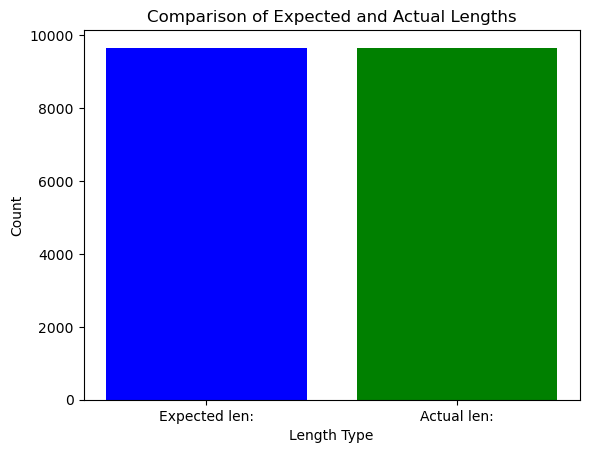

In [93]:
expected_len = len(apk_data[1:]) - 1181
actual_len = len(reviews_max)

labels = ['Expected len:',  'Actual len:']
lengths = [expected_len,actual_len]

plt.bar(labels, lengths, color=['blue', 'green'])
plt.xlabel('Length Type')
plt.ylabel('Count')
plt.title('Comparison of Expected and Actual Lengths')

print('Expected len:', expected_len)
print('Actual len:', actual_len)


In [94]:
apk_clean = []
already_added = []
for app in apk_data[1:]:
    name = app[0]
    n_reviews = float(app[3])
    
    if (reviews_max[name] == n_reviews) and (name not in already_added):
        apk_clean.append(app)
        already_added.append(name)

In [95]:
explore_data(apk_clean, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9659
Number of columns: 13


We have 9659 rows, just as expected.

## Removing Non-English Apps

Some of the names of the applications, if looking at the data sets long enough, are likely not appropriate for an English-speaking audience. Here are some examples from both sets of data:

In [96]:
def non_english(strings):
    for character in strings:
        if ord(character)> 127:
            return False 
    return True

In [97]:
print(non_english('Instagram'))
print(non_english('爱奇艺PPS -《欢乐颂2》电视剧热播'))

True
False


 ## Removing Non-English Apps

In [98]:
def non_english(string):
    non_char = 0
    
    for character in string:
        if ord(character) > 127:
            non_char += 1
    
    if non_char > 3:
        return False
    else:
        return True

In [99]:
print(non_english('Docs To Go™ Free Office Suite'))
print(non_english('Instachat 😜'))

True
True


In [100]:
apk_english = []
ios_english = []

for app in apk_data[1:]:
    name = app[0]
    if non_english(name):
        apk_english.append(app)
        
for app in ios_data[1:]:
    name = app[0]
    if non_english(name):
        ios_english.append(app)        

In [101]:
explore_data(apk_english, 0, 4, True)
print('\n')
explore_data(ios_english, 0, 4, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 10795
Number of columns: 13


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4

## Isolating the Free Apps
Just to take you back to our introduction, our company develops free-to-download-and-install apps; the in-app ads are merely our revenue streams. So, in the data sets, we will have admixtures of free and non-free apps, thus we should begin by singling out only the free apps.

In [102]:
print(apk_data[0:2])

[['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], ['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']]


In [103]:
print(ios_data[0:2])

[['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'], ['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']]


In [104]:
apk_final = []
ios_final = []

for app in apk_data[1:]:
    price = app[7]
    if price == '0':
        apk_final.append(app)
for app in ios_data[1:]:
    price = app[4]
    if price == '0.0':
        ios_final.append(app)

In [105]:
print(len(apk_final))
print(len(ios_final))

10040
4056


## Most Common Apps by Genre

This being so, our strategy to validate the idea for an app is threefold:

1. Forthcoming is the minimally possible version of the app for Android phones on Google Play.

2. Development is actually done and updated if in the course of feedback from users the ratings end up being good.

3. That is, only when after six months we have made sure that the app has already brought some profit, do we go on and develop the iOS app and load it into the App Store.

If we go on and push this, because in the end our goal is adding the app in the App Store and Google Play, we should be looking for successful app profiles that have an impact on one.

### part one

we can use to analyze the frequency tables:

In [106]:
def frequency(dataset,index):
    table = {}
    total = 0 
    
    for row in dataset:
        total += 1
        value = row[index]
        
        if value in table:
            table[value] += 1
        else:
            table[value] = 1
            
    table_percentages = {}
    
    for key in table:
        percentage = (table[key] / total) * 100
        table_percentages[key] = percentage 
    return table_percentages 
            

In [107]:
def display_table(dataset, index):
    table = frequency(dataset,index)
    
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)  
        table_display.append(key_val_as_tuple)  
        
    
    table_sorted = sorted(table_display, reverse=True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0]) 

In [108]:
print(ios_final[0])

['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


In [109]:
print(apk_final[1])

['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


## Genres

In [110]:
display_table(ios_final,11)


Games : 55.64595660749507
Entertainment : 8.234714003944774
Photo & Video : 4.117357001972387
Social Networking : 3.5256410256410255
Education : 3.2544378698224854
Shopping : 2.983234714003945
Utilities : 2.687376725838264
Lifestyle : 2.3175542406311638
Finance : 2.0710059171597637
Sports : 1.947731755424063
Health & Fitness : 1.8737672583826428
Music : 1.6518737672583828
Book : 1.6272189349112427
Productivity : 1.5285996055226825
News : 1.4299802761341223
Travel : 1.3806706114398422
Food & Drink : 1.0601577909270217
Weather : 0.7642998027613412
Reference : 0.4930966469428008
Navigation : 0.4930966469428008
Business : 0.4930966469428008
Catalogs : 0.22189349112426035
Medical : 0.19723865877712032


In [111]:
display_table(apk_final,1)

FAMILY : 17.739043824701195
GAME : 10.56772908366534
TOOLS : 7.6195219123505975
BUSINESS : 4.442231075697211
PRODUCTIVITY : 3.944223107569721
LIFESTYLE : 3.6155378486055776
SPORTS : 3.5856573705179287
COMMUNICATION : 3.5856573705179287
MEDICAL : 3.5258964143426295
FINANCE : 3.4760956175298805
HEALTH_AND_FITNESS : 3.237051792828685
PHOTOGRAPHY : 3.117529880478088
PERSONALIZATION : 3.0776892430278884
SOCIAL : 2.908366533864542
NEWS_AND_MAGAZINES : 2.7988047808764938
SHOPPING : 2.5697211155378485
TRAVEL_AND_LOCAL : 2.450199203187251
DATING : 2.2609561752988045
BOOKS_AND_REFERENCE : 2.0219123505976095
VIDEO_PLAYERS : 1.7031872509960162
EDUCATION : 1.5139442231075697
ENTERTAINMENT : 1.4641434262948207
MAPS_AND_NAVIGATION : 1.3147410358565739
FOOD_AND_DRINK : 1.245019920318725
HOUSE_AND_HOME : 0.8764940239043826
LIBRARIES_AND_DEMO : 0.8366533864541833
AUTO_AND_VEHICLES : 0.8167330677290837
WEATHER : 0.7370517928286853
EVENTS : 0.6274900398406374
ART_AND_DESIGN : 0.6175298804780877
COMICS : 0

## Category

In [112]:
display_table(apk_final,9)

Tools : 7.609561752988048
Entertainment : 6.01593625498008
Education : 5.169322709163347
Business : 4.442231075697211
Productivity : 3.944223107569721
Sports : 3.7250996015936253
Lifestyle : 3.6055776892430282
Communication : 3.5856573705179287
Medical : 3.5258964143426295
Finance : 3.4760956175298805
Action : 3.396414342629482
Health & Fitness : 3.237051792828685
Photography : 3.117529880478088
Personalization : 3.0776892430278884
Social : 2.908366533864542
News & Magazines : 2.7988047808764938
Shopping : 2.5697211155378485
Travel & Local : 2.4402390438247012
Dating : 2.2609561752988045
Books & Reference : 2.0219123505976095
Arcade : 1.9920318725099602
Simulation : 1.902390438247012
Casual : 1.8326693227091633
Video Players & Editors : 1.6832669322709164
Maps & Navigation : 1.3147410358565739
Food & Drink : 1.245019920318725
Puzzle : 1.205179282868526
Racing : 0.9462151394422311
Strategy : 0.9362549800796812
House & Home : 0.8764940239043826
Role Playing : 0.8665338645418327
Libraries

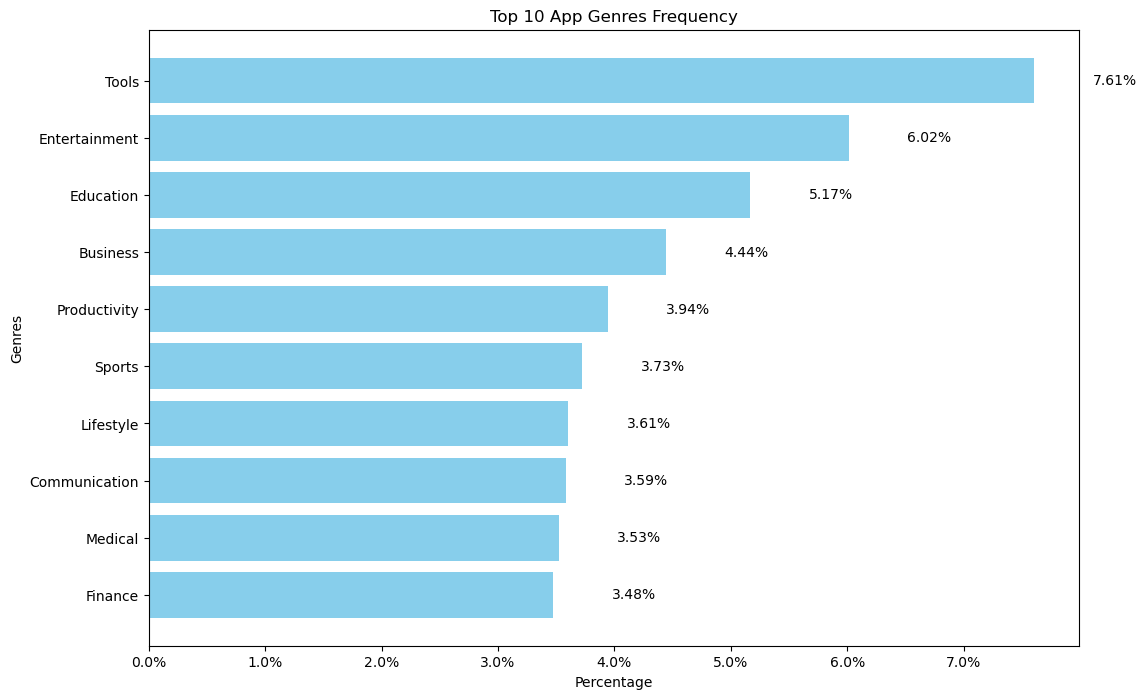

In [124]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Generate chart for genres
def chart_for_genres(dataset, index, top_n=10):
    table = frequency(dataset, index)
    table_sorted = sorted(table.items(), key=lambda item: item[1], reverse=True)[:top_n]
    genres = [item[0] for item in table_sorted]
    percentages = [item[1] for item in table_sorted]

    plt.figure(figsize=(12, 8))
    bars = plt.barh(genres, percentages, color='skyblue')
    plt.xlabel('Percentage')
    plt.ylabel('Genres')
    plt.title(f'Top {top_n} App Genres Frequency')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest percentage on top
    
    # Add data labels
    for bar in bars:
        width = bar.get_width()
        label_x_pos = width + 0.5  # Adjusted for cleaner appearance
        plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center')
    
    # Use percentage format for x-axis
    plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())
    
    plt.show()

# Generate the chart for top 10 genres (index 9)
chart_for_genres(apk_final, 9, top_n=10)


## Most Popular Apps by Genre on the App Store

we can find this though most install appication 

In [114]:
genres_ios = frequency(ios_final, -5)

for genre in genres_ios:
    total = 0
    len_genre = 0
    for app in ios_final:
        genre_app = app[-5]
        if genre_app == genre:            
            n_ratings = float(app[5])
            total += n_ratings
            len_genre += 1
    avg_n_ratings = total / len_genre
    print(genre, ':', avg_n_ratings)

Social Networking : 53078.195804195806
Photo & Video : 27249.892215568863
Games : 18924.68896765618
Music : 56482.02985074627
Reference : 67447.9
Health & Fitness : 19952.315789473683
Weather : 47220.93548387097
Utilities : 14010.100917431193
Travel : 20216.01785714286
Shopping : 18746.677685950413
News : 15892.724137931034
Navigation : 25972.05
Lifestyle : 8978.308510638299
Entertainment : 10822.961077844311
Food & Drink : 20179.093023255813
Sports : 20128.974683544304
Book : 8498.333333333334
Finance : 13522.261904761905
Education : 6266.333333333333
Productivity : 19053.887096774193
Business : 6367.8
Catalogs : 1779.5555555555557
Medical : 459.75


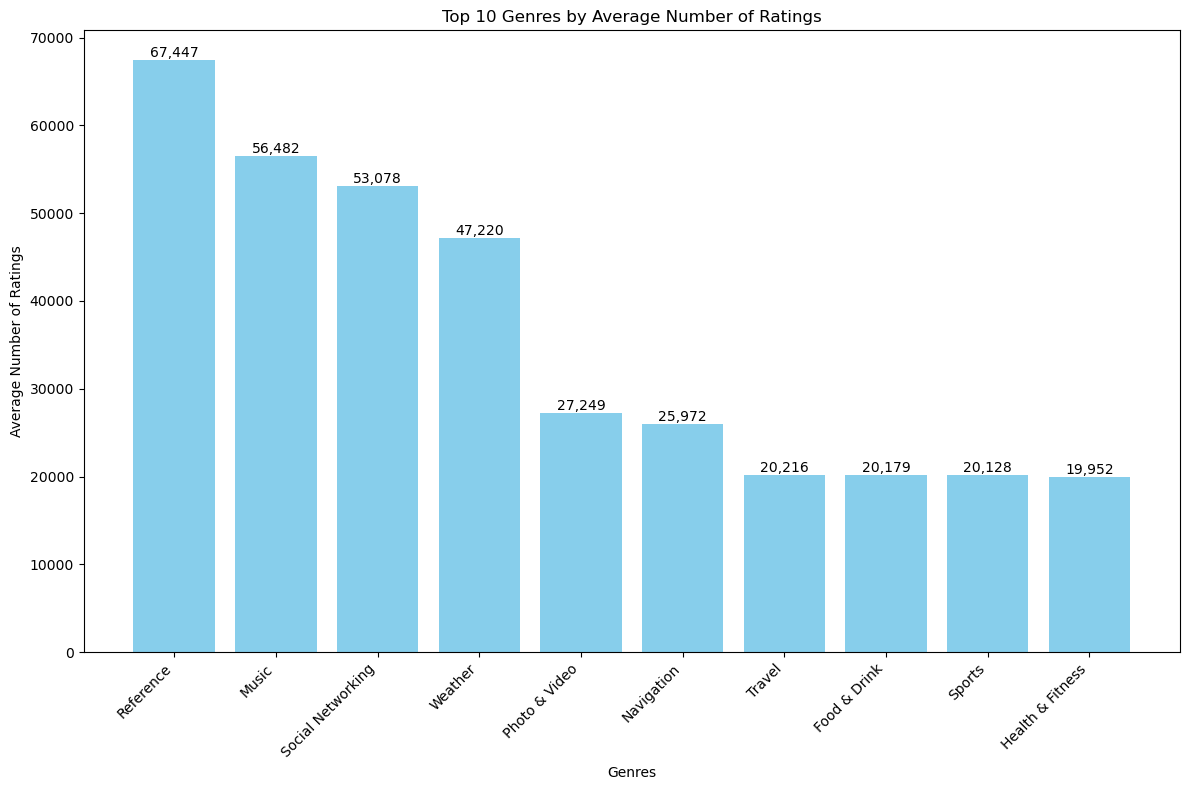

In [127]:
# Calculate the average number of ratings for each genre
genres_ios = frequency(ios_final, -5)
avg_ratings = []

for genre in genres_ios:
    total = 0
    len_genre = 0
    for app in ios_final:
        genre_app = app[-5]
        if genre_app == genre:            
            n_ratings = float(app[5])
            total += n_ratings
            len_genre += 1
    avg_n_ratings = total / len_genre
    avg_ratings.append((genre, avg_n_ratings))

# Sort the average ratings by value in descending order and limit to top 10 for better readability
avg_ratings_sorted = sorted(avg_ratings, key=lambda x: x[1], reverse=True)[:10]
genres = [x[0] for x in avg_ratings_sorted]
avg_ratings_values = [x[1] for x in avg_ratings_sorted]

# Create a vertical bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(genres, avg_ratings_values, color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Average Number of Ratings')
plt.title('Top 10 Genres by Average Number of Ratings')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height):,}', ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to make room for the rotated labels
plt.show()

## Most Popular Apps by Genre on Google Play

In [115]:
display_table(apk_final, 5) 

1,000,000+ : 15.488047808764941
10,000,000+ : 12.4402390438247
100,000+ : 10.747011952191235
10,000+ : 9.213147410358566
1,000+ : 7.5498007968127485
5,000,000+ : 7.49003984063745
100+ : 6.205179282868526
500,000+ : 5.249003984063745
50,000+ : 4.342629482071713
5,000+ : 4.083665338645418
100,000,000+ : 4.073705179282869
10+ : 3.1474103585657374
500+ : 2.888446215139442
50,000,000+ : 2.8784860557768925
50+ : 1.7031872509960162
500,000,000+ : 0.7171314741035857
5+ : 0.697211155378486
1,000,000,000+ : 0.5776892430278884
1+ : 0.4581673306772908
0+ : 0.0398406374501992
0 : 0.0099601593625498


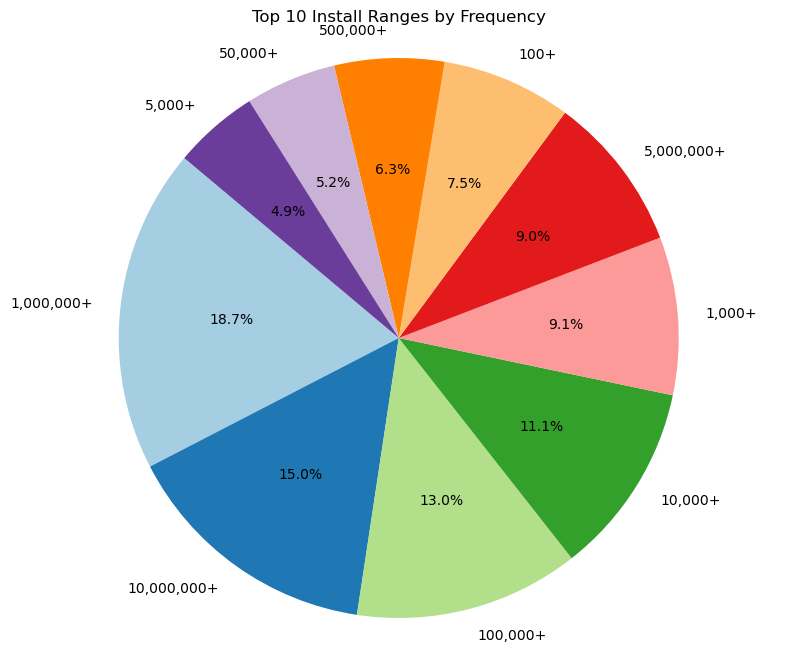

In [128]:
# Generate chart for installs
def pie_chart_for_installs(dataset, index, top_n=10):
    table = frequency(dataset, index)
    table_sorted = sorted(table.items(), key=lambda item: item[1], reverse=True)[:top_n]
    install_ranges = [x[0] for x in table_sorted]
    percentages = [x[1] for x in table_sorted]

    # Generate the pie chart
    plt.figure(figsize=(10, 8))
    plt.pie(percentages, labels=install_ranges, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title(f'Top {top_n} Install Ranges by Frequency')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Generate the pie chart for top install ranges (index 5)
pie_chart_for_installs(apk_final, 5, top_n=10)

## Conclusion

AppTrendz had taken us through a great ride of the worlds of mobile application data from the Apple Store and the Android Store. Our study was focused on free to download apps from both stores, keeping an eye to try and understand how it was even possible for in-app advertising to be an effective revenue model given the dynamics around user engagement.

Meticulous statistical analysis has really unveiled significant trends and patterns that aid in the prediction of user engagement and popularity of apps in the world of mobile apps. It is important to realize that user engagement remains correlated with the frequency and type of in-app ads, not to mention the genre and size of apps, among other attributes such as users' reviews. This is because our genre analysis points out certain genres always get more users; the Games genre, Social Networking genre, and Entertainment app genre stand high in user engagement.

According to our predictive analysis, future trends would indicate that these three genres are most likely going to dominate further, with technology and customer preferences going in favor of niche categories. For the technical performance evaluation, user experience was highlighted as being affected by app speed and reliability so that high engagement is kept up.

In sum, "AppTrendz" has paid off quite substantially in broadening our current mobile market understanding and providing us skillful perspectives in strategic decisions about app development and marketing. The following insights from the particular project, therefore, re-emphasize the use of user-centered design along with placing strategic advertisements and tracking market changes in order to make it big in an App world where cut-throat competition holds the key. A real illustration of excellent analytical abilities: it takes the modification of intricate figures into concrete strategies, presenting essential competencies for anybody willing to be successful or navigate into the field of mobile app development.